# 전국 신규 민간 아파트 분양가격 동향
* 2015년 10월부터 2018년 4월까지
* 주택분양보증을 받아 분양한 전체 민간 신규아파트 분양가격 동향
* https://www.data.go.kr/dataset/3035522/fileData.do

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import re
from plotnine import *

In [3]:
pre_sale = pd.read_csv('data/지역별_규모별_㎡당_평균_분양가격_천원__18.4월.csv', encoding='euc-kr')
pre_sale.shape

(2635, 5)

In [4]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [5]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
2630,제주,전체,2018,4,3925
2631,제주,전용면적 60㎡이하,2018,4,5462
2632,제주,전용면적 60㎡초과 85㎡이하,2018,4,3639
2633,제주,전용면적 85㎡초과 102㎡이하,2018,4,NaN
2634,제주,전용면적 102㎡초과,2018,4,3029


In [6]:
# 분양가격이 숫자 타입이 아닙니다. 숫자 타입으로 변경해줄 필요가 있겠어요.
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2635 entries, 0 to 2634
Data columns (total 5 columns):
지역명        2635 non-null object
규모구분       2635 non-null object
연도         2635 non-null int64
월          2635 non-null int64
분양가격(㎡)    2520 non-null object
dtypes: int64(2), object(3)
memory usage: 103.0+ KB


In [7]:
pre_sale_price = pre_sale['분양가격(㎡)']

In [8]:
# 연도와 월은 카테고리 형태의 데이터이기 때문에 스트링 형태로 변경
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [9]:
# 분양가격의 타입을 숫자로 변경해 줍니다.
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')
# 평당 분양가격을 구해볼까요.
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [10]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2635 entries, 0 to 2634
Data columns (total 7 columns):
지역명        2635 non-null object
규모구분       2635 non-null object
연도         2635 non-null object
월          2635 non-null object
분양가격(㎡)    2520 non-null object
분양가격       2428 non-null float64
평당분양가격     2428 non-null float64
dtypes: float64(2), object(5)
memory usage: 144.2+ KB


In [11]:
# 분양가격에 결측치가 많이 있어요.
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    115
분양가격       207
평당분양가격     207
dtype: int64

In [12]:
pre_sale.describe()

,분양가격,평당분양가격
count,2428.000000,2428.000000
mean,3038.875206,10028.288180
std,1101.582108,3635.220957
min,1868.000000,6164.400000
25%,2322.000000,7662.600000
50%,2727.000000,8999.100000
75%,3274.000000,10804.200000
max,8096.000000,26716.800000


In [13]:
# 2017년 데이터만 봅니다.
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == 2017]
pre_sale_2017.shape

(0, 7)

In [14]:
# 같은 값을 갖고 있는 걸로 시도별로 동일하게 데이터가 들어 있는 것을 확인할 수 있습니다.
pre_sale['규모구분'].value_counts()

전용면적 102㎡초과          527
전용면적 60㎡초과 85㎡이하     527
전체                   527
전용면적 60㎡이하           527
전용면적 85㎡초과 102㎡이하    527
Name: 규모구분, dtype: int64

# 전국평균 분양가격

In [15]:
# 분양가격만 봤을 때 2015년에서 2018년으로 갈수록 오른 것을 확인할 수 있습니다.
pd.options.display.float_format = '{:,.0f}'.format
pre_sale.groupby(pre_sale.연도).describe().T

연도             2015   2016   2017   2018
분양가격   count    243    984    899    302
       mean   2,789  2,934  3,140  3,281
       std      977  1,071  1,108  1,197
       min    1,868  1,900  1,976  2,076
       25%    2,225  2,282  2,365  2,442
       50%    2,516  2,672  2,849  2,894
       75%    3,026  3,148  3,456  3,629
       max    7,092  8,096  7,887  7,823
평당분양가격 count    243    984    899    302
       mean   9,203  9,683 10,360 10,829
       std    3,224  3,536  3,655  3,950
       min    6,164  6,270  6,521  6,851
       25%    7,342  7,531  7,804  8,057
       50%    8,303  8,818  9,402  9,550
       75%    9,984 10,390 11,405 11,975
       max   23,404 26,717 26,027 25,816

In [16]:
## 규모별 전국 평균 분양가격

In [17]:
pre_sale.pivot_table('평당분양가격', '규모구분', '연도')

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,227"
전용면적 60㎡이하,"8,952","9,399","10,246","10,918"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,342"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,419"
전체,"8,893","9,293","9,901","10,493"


# 전국 분양가 변동금액
규모구분이 전체로 되어있는 금액으로 연도별 변동금액을 살펴봅니다.

In [18]:
# 규모구분에서 전체로 되어있는 데이터만 가져온다.
region_year_all = pre_sale.loc[pre_sale['규모구분'] == '전체']
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()

region_year['변동액'] = region_year['2018'] - region_year['2015']
max_delta_price = np.max(region_year['변동액']).astype(int)*1000
min_delta_price = np.min(region_year['변동액']).astype(int)*1000
mean_delta_price = np.mean(region_year['변동액']).astype(int)*1000

print('2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 {:,.0f}원이다.'.format(max_delta_price))
print('상승액이 가장 작은 지역은 울산이며 평당 {:,.0f}원이다.'.format(min_delta_price))
print('전국 평균 변동액은 평당 {:,.0f}원이다.'.format(mean_delta_price))

region_year

2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 5,229,000원이다.
상승액이 가장 작은 지역은 울산이며 평당 411,000원이다.
전국 평균 변동액은 평당 1,600,000원이다.


연도,지역명,2015,2016,2017,2018,변동액
0,강원,"7,160","7,011","7,127","7,685",525
1,경기,"10,377","11,220","11,850","12,752","2,375"
2,경남,"7,586","7,848","8,120","8,894","1,309"
3,경북,"7,171","7,361","7,795","8,054",883
4,광주,"8,052","8,899","9,464","9,572","1,520"
5,대구,"9,232","10,310","11,456","11,439","2,206"
6,대전,"8,098","8,502","9,045","9,479","1,381"
7,부산,"10,307","10,430","11,578","12,682","2,375"
8,서울,"19,725","20,663","21,376","22,218","2,493"
9,세종,"8,750","8,860","9,135","10,407","1,656"


# 연도별 변동 그래프

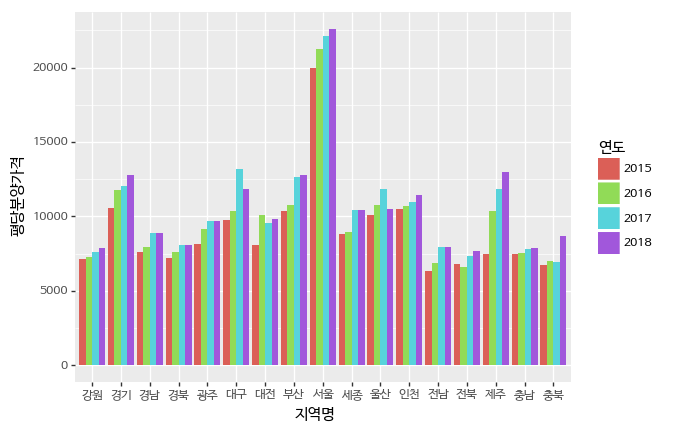

<ggplot: (289804790)>

In [19]:
(ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='NanumBarunGothic'))
)

## 지역별 평당 분양가격 합계
* 아래 데이터로 어느정도 규모로 분양사업이 이루어졌는지를 봅니다.
* 전체 데이터로 봤을 때 서울, 경기, 부산, 제주에 분양 사업이 다른 지역에 비해 규모가 큰 것으로 보여지지만 분양가격대비로 나눠볼 필요가 있습니다.

In [20]:
pre_sale.pivot_table('평당분양가격', '규모구분', '지역명')

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
전용면적 102㎡초과,"7,821","13,535","9,207","8,524","10,572","12,137","14,282","12,577","21,946","9,186","9,974","13,765","7,510","7,698","10,467","8,479","7,827"
전용면적 60㎡이하,"7,163","12,138","8,272","7,612","8,441","11,200","8,854","10,548","21,840","8,991","8,965","10,817","6,955","7,077","14,423","7,755","6,905"
전용면적 60㎡초과 85㎡이하,"7,195","11,555","8,039","7,593","9,119","10,811","8,709","11,031","20,628","9,160","10,668","10,652","6,890","6,820","9,768","7,440","6,935"
전용면적 85㎡초과 102㎡이하,"7,445","11,840","9,861","8,776","9,296","9,457","8,947","10,887","23,569","9,134","8,861","11,301","7,804","7,670","10,744","9,116","8,088"
전체,"7,158","11,571","8,061","7,593","9,111","10,773","8,791","11,139","21,038","9,156","10,644","10,693","6,903","6,824","10,048","7,431","6,878"


## 규모별 

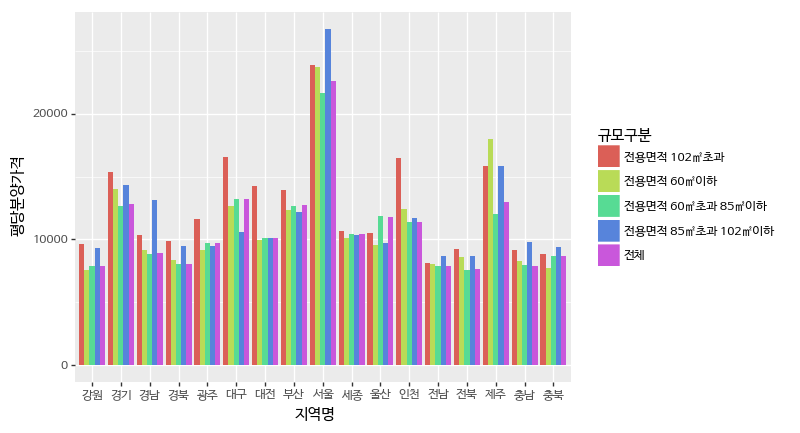

<ggplot: (289804755)>

In [21]:
# 서울의 경우 전용면적 85㎡초과 102㎡이하가 분양가격이 가장 비싸게 나옵니다.
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='NanumBarunGothic'))
)

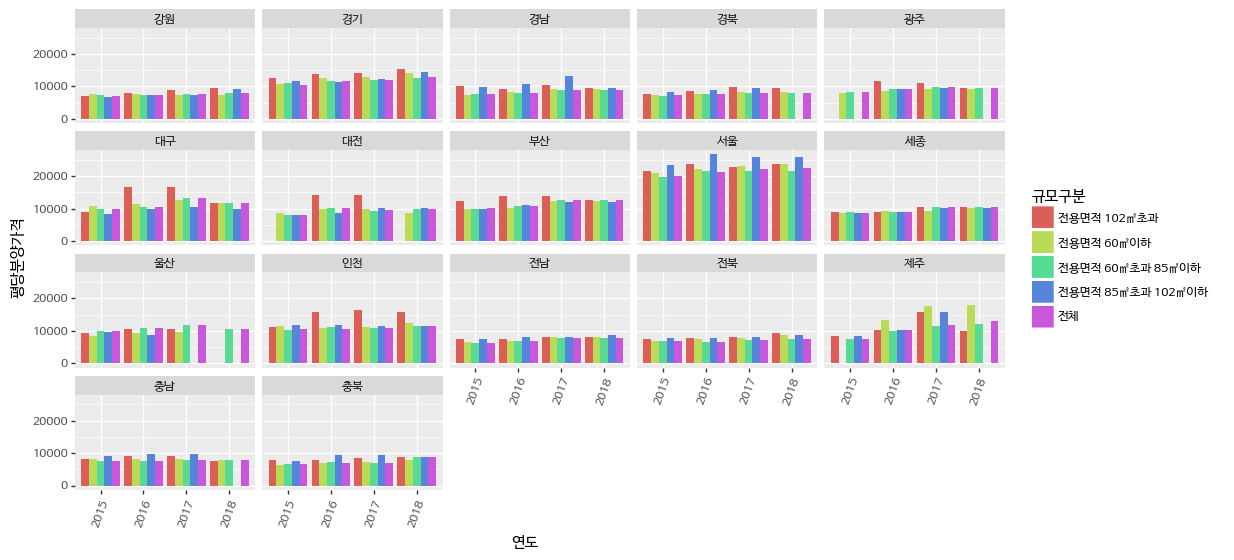

<ggplot: (289877936)>

In [22]:
# 위에 그린 그래프를 지역별로 나눠 봅니다.
(ggplot(pre_sale)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_bar(stat='identity', position='dodge')
 + facet_wrap('지역명')
 + theme(text=element_text(family='NanumBarunGothic'),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 6))
)

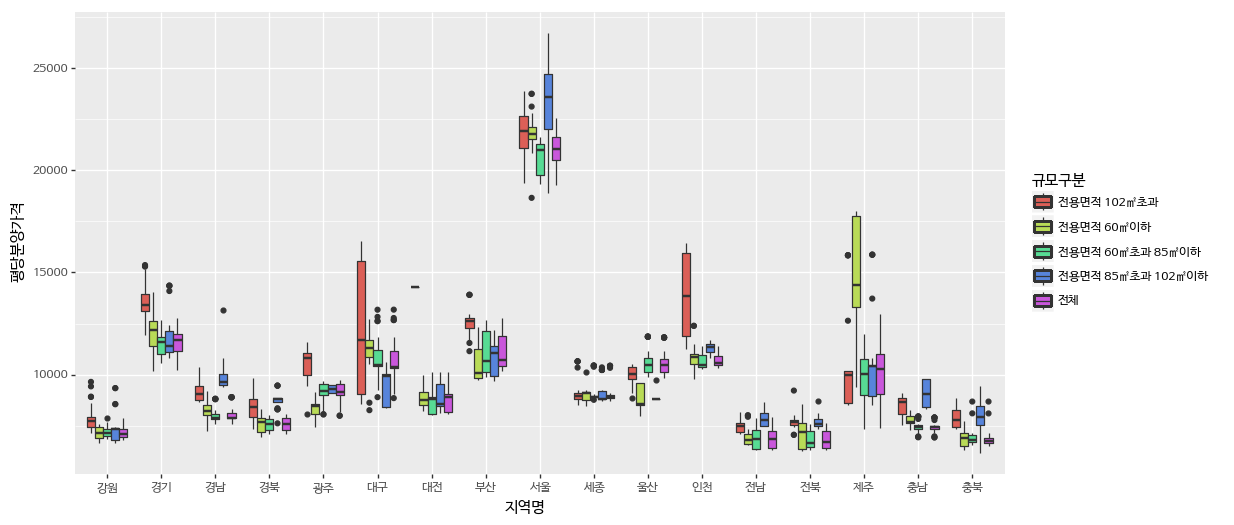

<ggplot: (291521249)>

In [23]:
# 박스플롯을 그려본다.
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(12, 6))
)

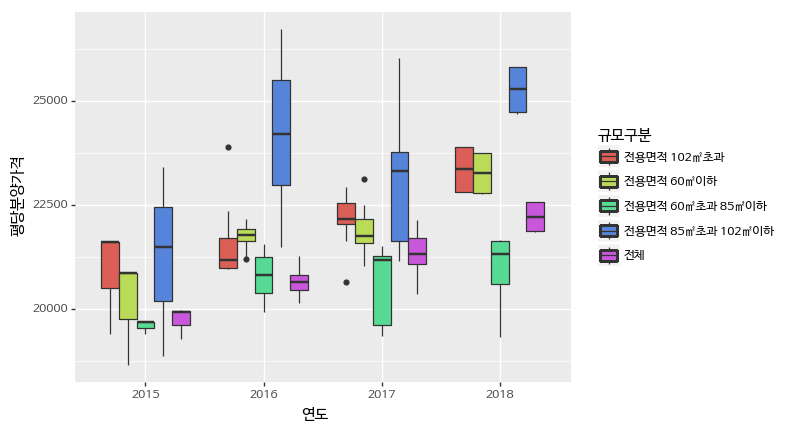

<ggplot: (-9223372036580362338)>

In [24]:
pre_sale_seoul = pre_sale.loc[pre_sale['지역명']=='서울']
(ggplot(pre_sale_seoul)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)

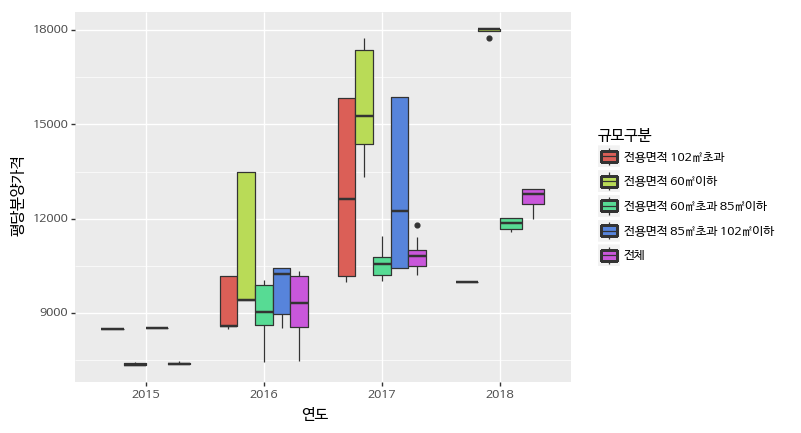

<ggplot: (-9223372036564375976)>

In [25]:
# 2015년에서 2018년까지 분양가 차이가 가장 컸던 제주를 보자.
(ggplot(pre_sale.loc[pre_sale['지역명']=='제주'])
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)

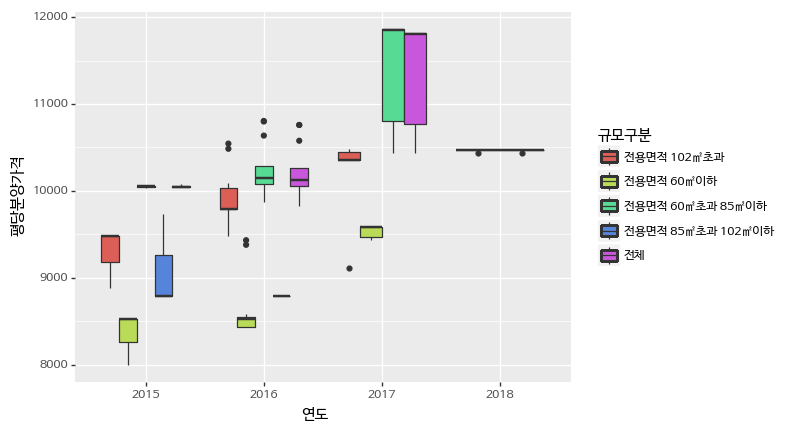

<ggplot: (-9223372036564697870)>

In [26]:
# 2015년에서 2018년까지 분양가 차이가 가장 작았던 울산을 보자.
(ggplot(pre_sale.loc[pre_sale['지역명']=='울산'])
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [27]:
pre_sale_16_1 = pd.read_csv('data/지역별_규모별_㎡당_평균_분양가격_천원__16.1월.csv', encoding='euc-kr')
pre_sale_16_1.shape

(68, 3)

In [28]:
# 16년 1월 데이터이기 때문에 별도의 기간 데이터가 없다.
pre_sale_16_1.head()

,지역,구분,분양가격
0,서울,60㎡이하,6427
1,인천,60㎡이하,3328
2,경기,60㎡이하,3293
3,부산,60㎡이하,2951
4,대구,60㎡이하,3341


In [29]:
pre_sale_16_1.describe()

,지역,구분,분양가격
count,68,68,68
unique,17,4,65
top,경남,102㎡초과,-
freq,4,17,4


In [30]:
pre_sale_16_1['구분'].unique()

array(['60㎡이하', '60㎡초과\n85㎡이하', '85㎡초과\n102㎡이하', '102㎡초과'], dtype=object)

In [31]:
pre_sale_16_1['구분'].value_counts()

102㎡초과           17
60㎡이하            17
60㎡초과\n85㎡이하     17
85㎡초과\n102㎡이하    17
Name: 구분, dtype: int64

# 2013년 12월~2015년 9월 3.3㎡당 분양가격
* 2015년 10월부터 2018년 4월까지 데이터는 평당 분양가로 조정을 해주었었는데 이 데이터는 평당 분양가가 들어가 있다.

In [32]:
df = pd.read_csv('data/지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv', \
                 encoding='euc-kr', skiprows=1, header=0)
df.shape

(23, 27)

In [33]:
# pandas에서 보기 쉽게 컬럼을 변경해 줄 필요가 있다.
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,구분,NaN,2013년,2014년,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: 천원/3.3㎡)
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722


In [34]:
year = df.iloc[0]
month = df.iloc[1]

In [35]:
# 결측치를 채워준다.
year

Unnamed: 0                구분
Unnamed: 1               NaN
Unnamed: 2             2013년
Unnamed: 3             2014년
Unnamed: 4               NaN
Unnamed: 5               NaN
Unnamed: 6               NaN
Unnamed: 7               NaN
Unnamed: 8               NaN
Unnamed: 9               NaN
Unnamed: 10              NaN
Unnamed: 11              NaN
Unnamed: 12              NaN
Unnamed: 13              NaN
Unnamed: 14              NaN
Unnamed: 15            2015년
Unnamed: 16              NaN
Unnamed: 17              NaN
Unnamed: 18              NaN
Unnamed: 19              NaN
Unnamed: 20              NaN
Unnamed: 21              NaN
Unnamed: 22              NaN
Unnamed: 23              NaN
Unnamed: 24              NaN
Unnamed: 25              NaN
Unnamed: 26    (단위: 천원/3.3㎡)
Name: 0, dtype: object

In [36]:
# 컬럼을 새로 만들어 주기 위해 0번째와 1번째 행을 합쳐준다.
for i, y in enumerate(year):
    if i > 2 and i < 15:
        year[i] = '2014년 ' + month[i]
    elif i >= 15:
        year[i] = '2015년 ' + month[i]
    elif i == 2 :
        year[i] =  year[i] + ' ' + month[i]
    elif i == 1:
        year[i] = '시군구'
        
print(year)

Unnamed: 0              구분
Unnamed: 1             시군구
Unnamed: 2       2013년 12월
Unnamed: 3        2014년 1월
Unnamed: 4        2014년 2월
Unnamed: 5        2014년 3월
Unnamed: 6        2014년 4월
Unnamed: 7        2014년 5월
Unnamed: 8        2014년 6월
Unnamed: 9        2014년 7월
Unnamed: 10       2014년 8월
Unnamed: 11       2014년 9월
Unnamed: 12      2014년 10월
Unnamed: 13      2014년 11월
Unnamed: 14      2014년 12월
Unnamed: 15       2015년 1월
Unnamed: 16       2015년 2월
Unnamed: 17       2015년 3월
Unnamed: 18       2015년 4월
Unnamed: 19       2015년 5월
Unnamed: 20       2015년 6월
Unnamed: 21       2015년 7월
Unnamed: 22       2015년 8월
Unnamed: 23       2015년 9월
Unnamed: 24      2015년 전월비
Unnamed: 25     2015년 전년말비
Unnamed: 26    2015년 전년동월비
Name: 0, dtype: object


In [37]:
df.columns = year

In [38]:
df = df.drop(df.index[[0,1]])
df

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722
10,NaN,NaN,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648",...,"8,692","8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352
11,경기,NaN,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124",...,"10,469","10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160


In [39]:
# 지역 컬럼을 새로 만들어 시도와 시군구를 합쳐준다.
df['구분'] = df['구분'].fillna('')
df['시군구'] = df['시군구'].fillna('')

In [40]:
df['지역'] = df['구분'] + df['시군구']

In [41]:
df['지역']

2          전국
3          서울
4     6대광역시부산
5          대구
6          인천
7          광주
8          대전
9          울산
10           
11         경기
12        수도권
13         세종
14       지방강원
15         충북
16         충남
17         전북
18         전남
19         경북
20         경남
21         제주
22           
Name: 지역, dtype: object

In [42]:
melt_columns = df.columns.copy()
melt_columns

Index(['구분', '시군구', '2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월', '2014년 9월',
       '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월', '2015년 2월',
       '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월', '2015년 7월', '2015년 8월',
       '2015년 9월', '2015년 전월비', '2015년 전년말비', '2015년 전년동월비', '지역'],
      dtype='object', name=0)

In [43]:
df_2013_2015 = pd.melt(df, id_vars=['지역'], value_vars=['2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월',
       '2014년 9월', '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월',
       '2015년 2월', '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월',
       '2015년 7월', '2015년 8월', '2015년 9월'])
df_2013_2015.head()

,지역,0,value
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [44]:
df_2013_2015.columns = ['지역', '기간', '분양가']
df_2013_2015.head()

,지역,기간,분양가
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [45]:
df_2013_2015['연도'] = df_2013_2015['기간'].apply(lambda year_month : year_month.split('년')[0])
df_2013_2015['월'] = df_2013_2015['기간'].apply(lambda year_month : re.sub('월', '', year_month.split('년')[1]).strip())

In [46]:
df_2013_2015.head()

,지역,기간,분양가,연도,월
0,전국,2013년 12월,"8,059",2013,12
1,서울,2013년 12월,"18,189",2013,12
2,6대광역시부산,2013년 12월,"8,111",2013,12
3,대구,2013년 12월,"8,080",2013,12
4,인천,2013년 12월,"10,204",2013,12


## TODO 지역명 강원과 부산 다시 작업 필요

In [47]:
df_2013_2015['지역'].value_counts()

           44
충북         22
경기         22
6대광역시부산    22
대구         22
수도권        22
전남         22
지방강원       22
경북         22
세종         22
광주         22
충남         22
전북         22
울산         22
경남         22
제주         22
인천         22
대전         22
전국         22
서울         22
Name: 지역, dtype: int64

In [48]:
df_2013_2015.describe()

,지역,기간,분양가,연도,월
count,462,462,462,462,462
unique,20,22,371,3,12
top,,2015년 3월,"8,067",2014,7
freq,44,21,7,252,42


In [49]:
df_2013_2015['분양가격'] = df_2013_2015['분양가'].str.replace(',', '').astype(int)

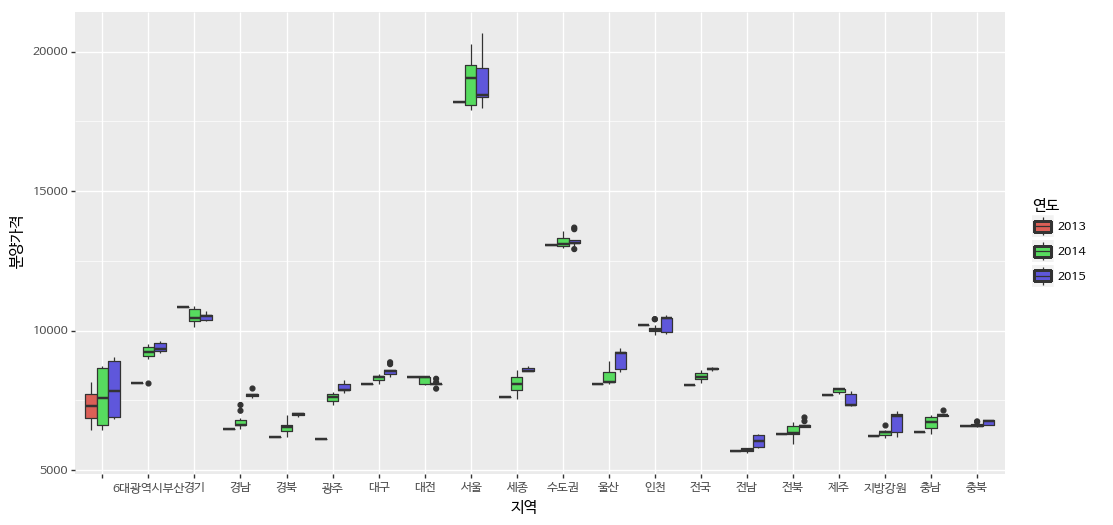

<ggplot: (-9223372036562395034)>

In [50]:
(ggplot(df_2013_2015, aes(x='지역', y='분양가격', fill='연도'))
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(12, 6))
)

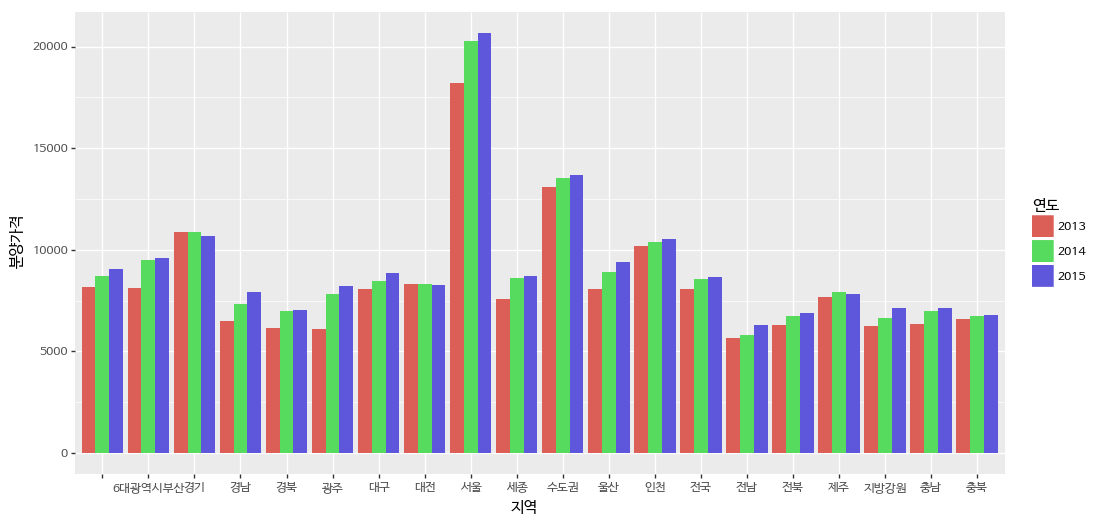

<ggplot: (290238314)>

In [51]:
(ggplot(df_2013_2015, aes(x='지역', y='분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(12, 6))
)

## 이제 2013년부터 2018년 4월까지 데이터를 합칠 준비가 됨